# Capstone - Initial EDA

Some EDA will be completed, using the previously cleaned London Airbnb dataset.

In [1]:
# imports

import pandas as pd
import numpy as ny

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Import cleaned dataset:
airbnb_ldn = pd.read_csv('airbnb_ldn_final.csv')

In [20]:
airbnb_ldn.shape

(32686, 39)

In [21]:
# drop 'Unnamed', column added due to additional index column being added with the import of the cleaned data:
airbnb_ldn.drop(columns = 'Unnamed: 0', inplace=True)

In [27]:
airbnb_ldn.columns

Index(['Listing Title', 'Property Type', 'Listing Type', 'City', 'Zipcode',
       'Number of Reviews', 'Bedrooms', 'Bathrooms', 'Max Guests',
       'Airbnb Superhost', 'Cancellation Policy', 'Cleaning Fee (Native)',
       'Extra People Fee(Native)', 'Check-in Time', 'Checkout Time',
       'Minimum Stay', 'Latitude', 'Longitude', 'Overall Rating',
       'Airbnb Communication Rating', 'Airbnb Accuracy Rating',
       'Airbnb Cleanliness Rating', 'Airbnb Checkin Rating',
       'Airbnb Location Rating', 'Airbnb Value Rating', 'Amenities',
       'Airbnb Host ID', 'Host Listing Count', 'guest_controls',
       'Pets Allowed', 'Count Available Days LTM', 'Count Blocked Days LTM',
       'Count Reservation Days LTM', 'Occupancy Rate LTM',
       'Number of Bookings LTM',
       'Number of Bookings LTM - Number of observed month',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (Native)'],
      dtype='object')

## Postcode Relevance

The first piece of EDA will be looking at the influence different regions have. To accurately model the dataset based on regions, the different rows must be grouped based on relevant locational differences. There are several columns that have locational information, these are: 'City', 'Zipcode' (sometimes referred to as Postcode), 'Latitude' and 'Longitude'. All of these different columns contain information that can and will be useful at different points in this project. For now, the easiest way to split the various rows of information is using the 'Zipcode' column.

Dataframes will be created for each of the different main London postal code prefix regions (denoted by the first or first two characters of the Zipcode). These are: W, WC, SW, NW, N, E, EC, SE.

In [28]:
# Create dataframes for each of the different postcode combinations in London:
w_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('W') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

n_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('N') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('W')]

e_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

wc_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.contains('WC')]

nw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NW')]

sw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SW')]

se_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SE')]

ec_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('EC')]

The main dataframe has been split into separate dataframes for each London postcode prefix. 

The mean of the 'Average Daily Rate (Native)', will be plotted:

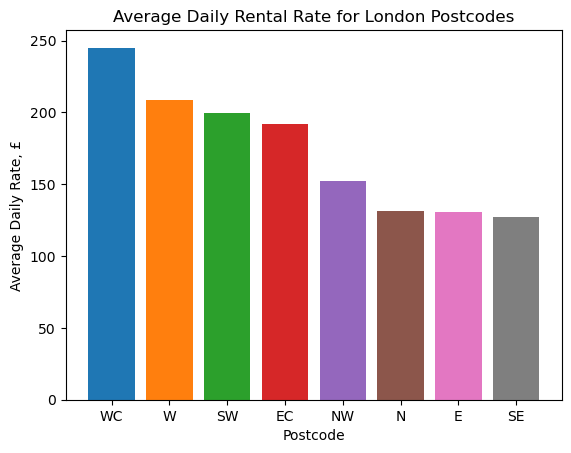

In [42]:
plt.figure()
plt.bar('WC', wc_zip['Average Daily Rate (Native)'].mean())
plt.bar('W', w_zip['Average Daily Rate (Native)'].mean())
plt.bar('SW', sw_zip['Average Daily Rate (Native)'].mean())
plt.bar('EC', ec_zip['Average Daily Rate (Native)'].mean())
plt.bar('NW', nw_zip['Average Daily Rate (Native)'].mean())
plt.bar('N', n_zip['Average Daily Rate (Native)'].mean())
plt.bar('E', e_zip['Average Daily Rate (Native)'].mean())
plt.bar('SE', se_zip['Average Daily Rate (Native)'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Daily Rental Rate for London Postcodes')
plt.show()

Looking at the bar chart above, it can be seen that the three most expensive regions all have a 'W' in their postcode prefix. This would indicate, that rental properties west of central in London, tend to demand a higher daily rental rate.

Hence, an initial insight is that there does definitely seem to be some correlation between London region and average daily rental rate. Will the conclusion being that properties with a 'W' in their prefix tend to be more expensive to rent.

**Looking at the correlation between overall rating and daily rental rate**

This comparison will be completed to see how the 'Avaerage Daily Rate' and the overall rating the property receives are related. 

First, the number of variables of overall ratings will be determined:

In [50]:
print(airbnb_ldn['Overall Rating'].unique())
print(f"The maximum rating a property can receive is {airbnb_ldn['Overall Rating'].max()} stars")
print(f"The minimum rating a property can receive is {airbnb_ldn['Overall Rating'].min()} stars")

[4.1 4.8 5.  4.  4.7 4.2 4.9 4.4 3.5 4.5 4.6 2.4 3.4 4.3 3.9 3.  1.  3.8
 3.6 3.2 3.1 2.  2.5 3.3 2.8 3.7 1.5 2.9 1.6 2.6 2.2 2.7 2.1]
The maximum rating a property can receive is 5.0 stars
The minimum rating a property can receive is 1.0 stars


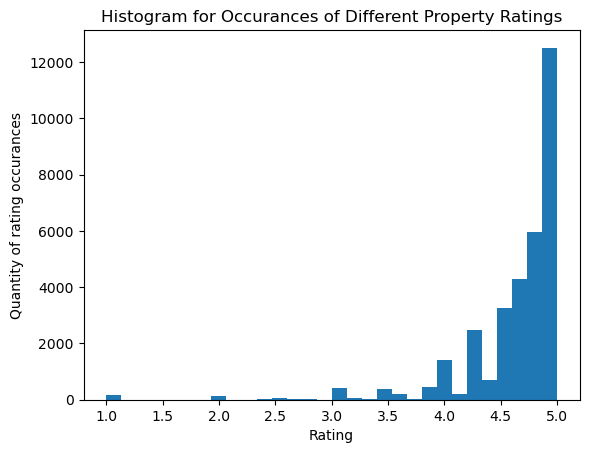

In [59]:
plt.figure()
plt.hist(airbnb_ldn['Overall Rating'], bins = 30)
plt.ylabel('Quantity of rating occurances')
plt.xlabel('Rating')
plt.title('Histogram for Occurances of Different Property Ratings')
plt.show()

Can see that the vast majority of ratings are above approximately 4.2 stars. Hence, the majority of London airbnb rental properties can be deemed to be off a high quality already.

These ratings and the Average daily rate will now be compared:

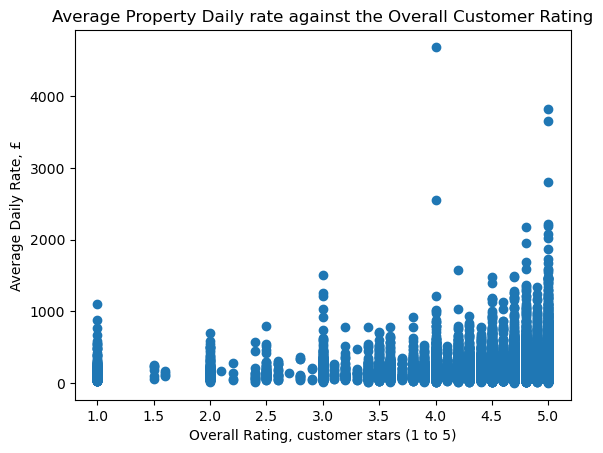

In [62]:
plt.figure()
plt.scatter(airbnb_ldn['Overall Rating'], airbnb_ldn['Average Daily Rate (Native)'])
plt.xlabel('Overall Rating, customer stars (1 to 5)')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Property Daily rate against the Overall Customer Rating')
plt.show()

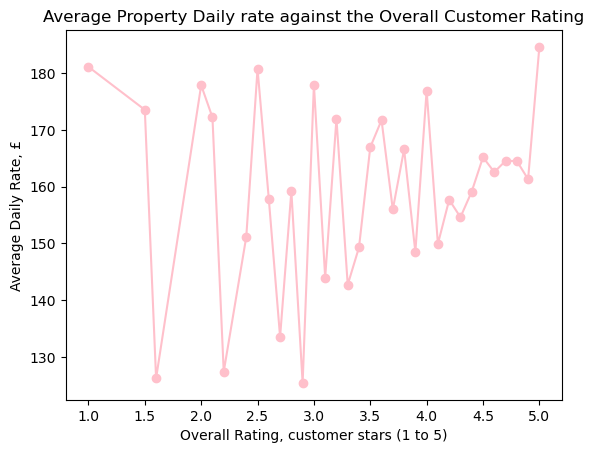

In [66]:
plt.figure()
(airbnb_ldn.groupby('Overall Rating')['Average Daily Rate (Native)'].mean()).plot(marker ='o', color ='pink')
plt.xlabel('Overall Rating, customer stars (1 to 5)')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Property Daily rate against the Overall Customer Rating')
plt.show()